In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/My Drive/rawDataset.csv'
results_path = '/content/drive/My Drive/results/'
eda_vis_path = results_path + 'eda_visualizations/'
os.makedirs(eda_vis_path, exist_ok=True)



In [4]:
columns = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
           'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification",
           "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced',
           'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
           'Age at enrollment', 'International', 'Curricular units 1st sem (credited)',
           'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
           'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
           'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
           'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
           'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
           'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']
df = pd.read_csv(data_path, sep=';', names=columns, header=0)



In [5]:
le = LabelEncoder()
df['Target_encoded'] = le.fit_transform(df['Target'])

In [7]:
X = df.drop(['Target', 'Target_encoded'], axis=1).select_dtypes(include=[np.number])
y = df['Target_encoded']
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_selected)
print("Variance Explained:", pca.explained_variance_ratio_.sum())


Selected Features: ['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']
Variance Explained: 0.997058173884396


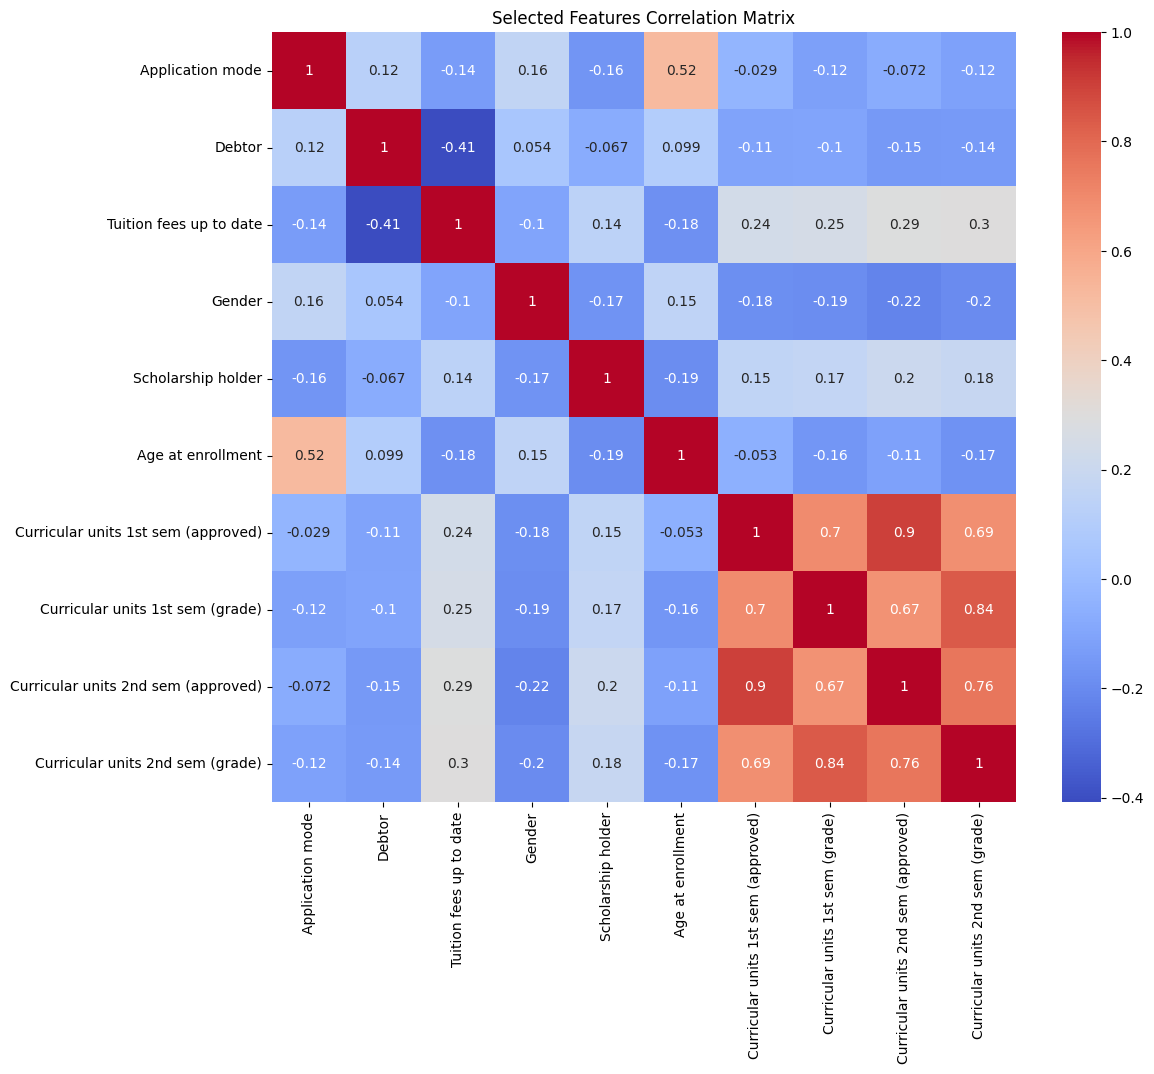

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(X[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title("Selected Features Correlation Matrix")
plt.savefig(eda_vis_path + 'member6_corr_matrix.png')
plt.show()
